
# E-commerce Customer Spending Prediction

This notebook analyzes customer behavior data from an e-commerce company and builds a **Linear Regression model** to predict yearly spending.

**Steps included:**
1. Load & explore data
2. Outlier detection (IQR method)
3. Exploratory Data Analysis (EDA)
4. Feature selection & train-test split
5. Model training
6. Model evaluation
7. Feature importance visualization
8. Residual analysis
9. Actual vs Predicted comparison


## 1. Import Required Libraries

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import pylab
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    r2_score,
    mean_squared_error,
    mean_absolute_error,
)

sns.set_style("whitegrid")


## 2. Load and Inspect Dataset

In [2]:

DATA_PATH = "Ecommerce Customers"

data = pd.read_csv(DATA_PATH)

print("\n--- First 10 rows ---")
display(data.head(10))

print("\n--- Missing values per column ---")
print(data.isnull().sum())

print("\n--- Number of duplicated rows ---")
print(data.duplicated().sum())

print("\n--- Dataset info ---")
print(data.info())

print("\n--- Descriptive statistics ---")
display(data.describe())



--- First 10 rows ---


,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
5,alvareznancy@lucas.biz,"645 Martha Park Apt. 611\nJeffreychester, MN 6...",FloralWhite,33.871038,12.026925,34.476878,5.493507,637.102448
6,katherine20@yahoo.com,"68388 Reyes Lights Suite 692\nJosephbury, WV 9...",DarkSlateBlue,32.021596,11.366348,36.683776,4.685017,521.572175
7,awatkins@yahoo.com,Unit 6538 Box 8980\nDPO AP 09026-4941,Aqua,32.739143,12.351959,37.373359,4.434273,549.904146
8,vchurch@walter-martinez.com,"860 Lee Key\nWest Debra, SD 97450-0495",Salmon,33.987773,13.386235,37.534497,3.273434,570.200409
9,bonnie69@lin.biz,"PSC 2734, Box 5255\nAPO AA 98456-7482",Brown,31.936549,11.814128,37.145168,3.202806,427.199385



--- Missing values per column ---
Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

--- Number of duplicated rows ---
0

--- Dataset info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB
None

--- Descript

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


## 3. Outlier Detection (IQR Method)

In [3]:

num_cols = data.select_dtypes(include=np.number).columns
print("\n--- Outlier counts per numeric column (IQR method) ---")
for col in num_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers_mask = (data[col] < lower) | (data[col] > upper)
    n_outliers = outliers_mask.sum()
    print(f"{col}: {n_outliers} outliers")



--- Outlier counts per numeric column (IQR method) ---
Avg. Session Length: 3 outliers
Time on App: 4 outliers
Time on Website: 2 outliers
Length of Membership: 12 outliers
Yearly Amount Spent: 9 outliers


## 4. Exploratory Data Analysis (EDA)

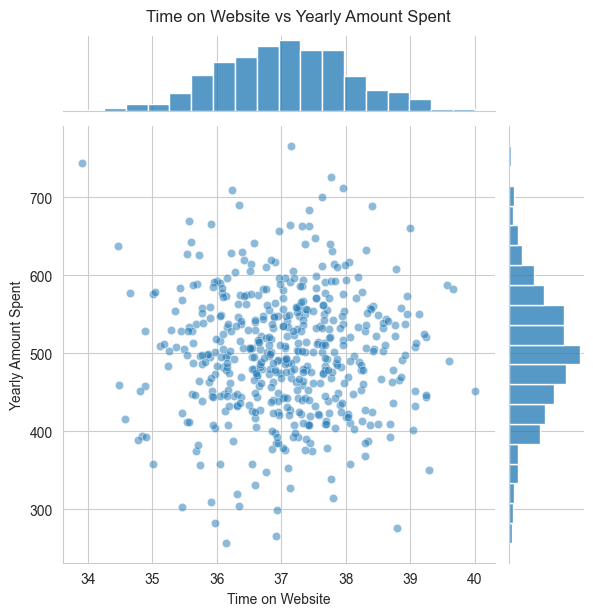

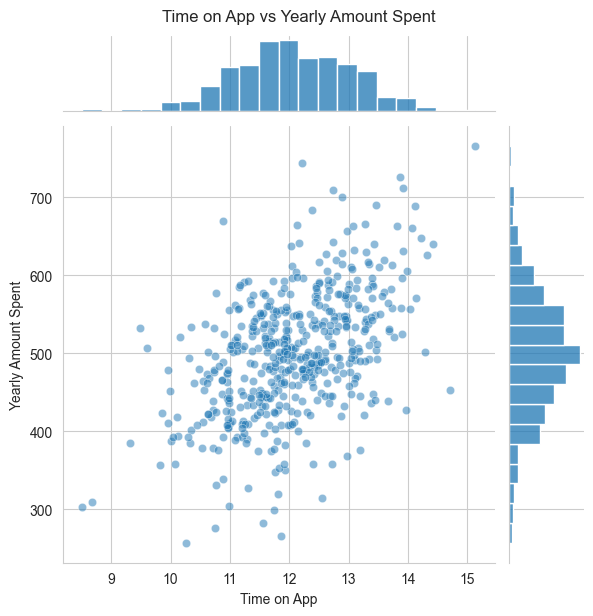

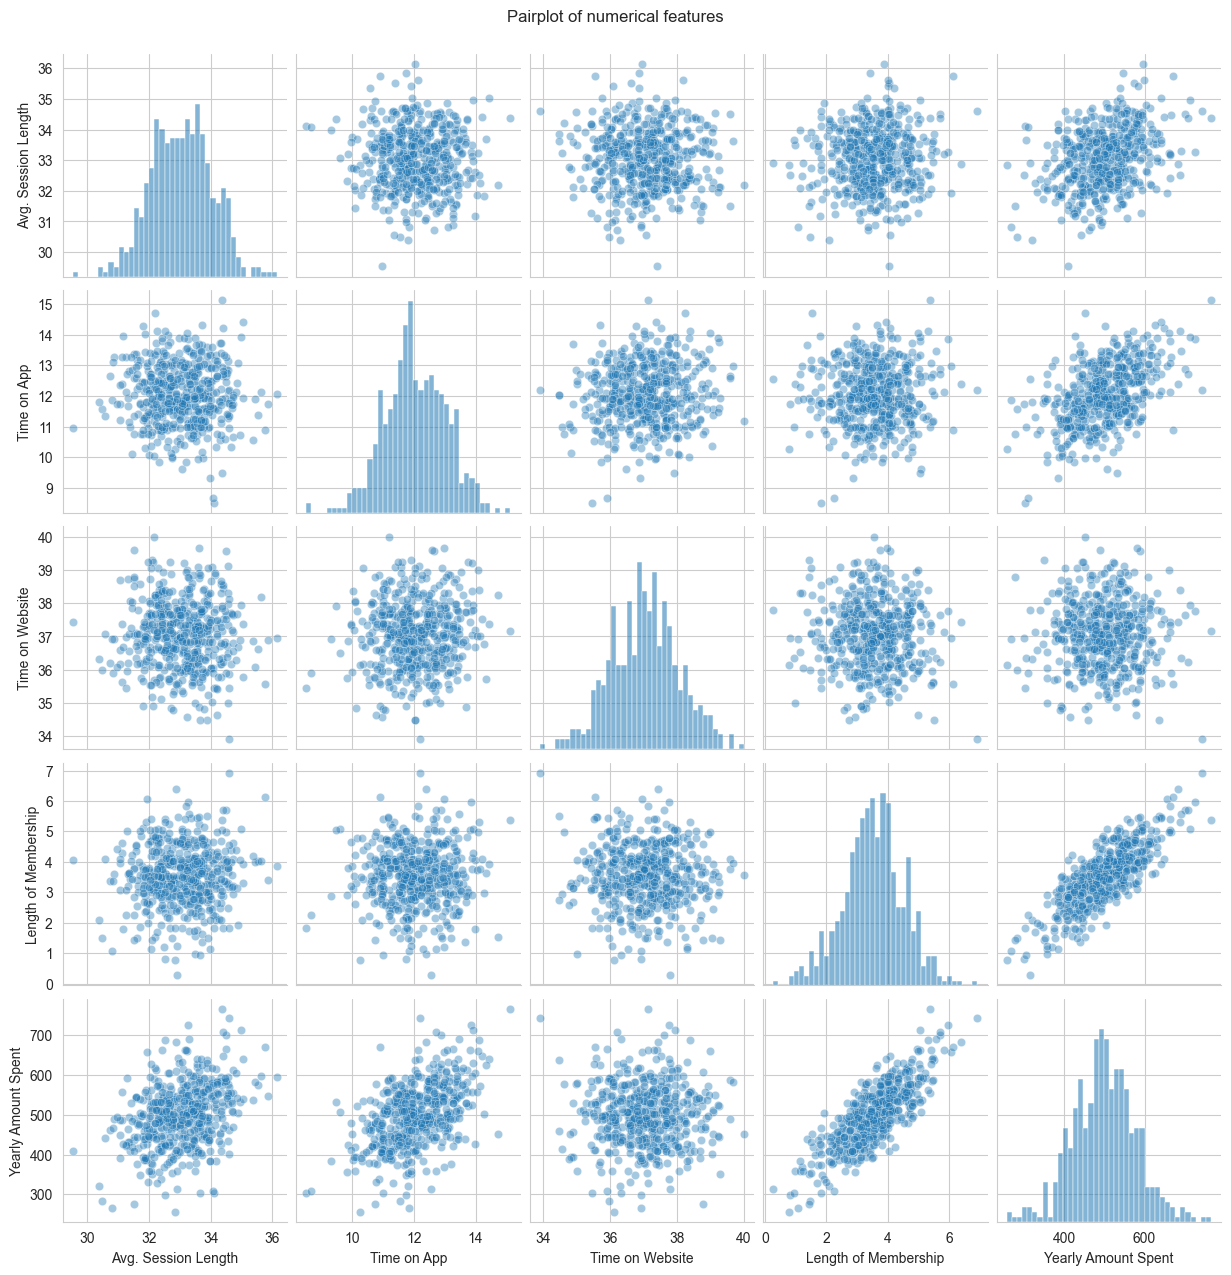

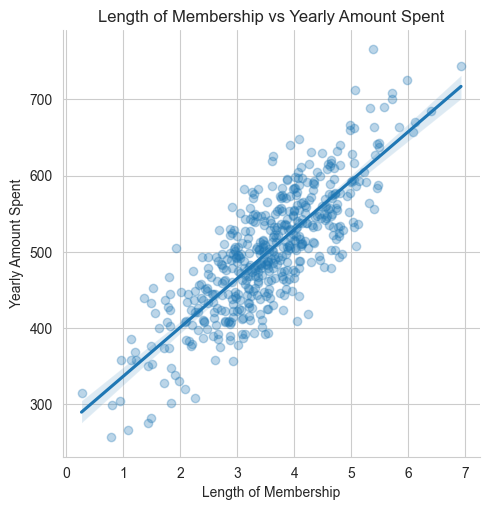

In [4]:

sns.jointplot(x="Time on Website", y="Yearly Amount Spent", data=data, alpha=0.5)
plt.suptitle('Time on Website vs Yearly Amount Spent', y=1.02)
plt.show()

sns.jointplot(x="Time on App", y="Yearly Amount Spent", data=data, alpha=0.5)
plt.suptitle('Time on App vs Yearly Amount Spent', y=1.02)
plt.show()

sns.pairplot(data, kind="scatter", plot_kws={"alpha": 0.4}, diag_kws={"alpha": 0.55, "bins": 40})
plt.suptitle('Pairplot of numerical features', y=1.02)
plt.show()

sns.lmplot(x="Length of Membership", y="Yearly Amount Spent", data=data, scatter_kws={"alpha": 0.3})
plt.title('Length of Membership vs Yearly Amount Spent')
plt.show()


## 5. Feature Selection & Train-Test Split

In [5]:

X = data[["Avg. Session Length", "Time on App", "Time on Website", "Length of Membership"]]
y = data["Yearly Amount Spent"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## 6. Model Training

In [6]:

lm = LinearRegression()
lm.fit(X_train, y_train)

coef_df = pd.DataFrame(lm.coef_, X.columns, columns=["Coef"]).sort_values(by="Coef", ascending=True)
print("\n--- Model Coefficients ---")
display(coef_df)

train_r2 = lm.score(X_train, y_train)
print("\nTraining R^2 Score:", train_r2)



--- Model Coefficients ---


,Coef
Time on Website,0.459148
Avg. Session Length,25.724256
Time on App,38.597135
Length of Membership,61.674732



Training R^2 Score: 0.9854085989105928


## 7. Predictions & Evaluation

In [7]:

predictions = lm.predict(X_test)

mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = math.sqrt(mse)
r2 = r2_score(y_test, predictions)

print("\n--- Model evaluation on test set ---")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"R^2 Score: {r2:.3f}")



--- Model evaluation on test set ---
Mean Absolute Error (MAE): 8.426
Mean Squared Error (MSE): 103.916
Root Mean Squared Error (RMSE): 10.194
R^2 Score: 0.981


## 8. Feature Importance Visualization

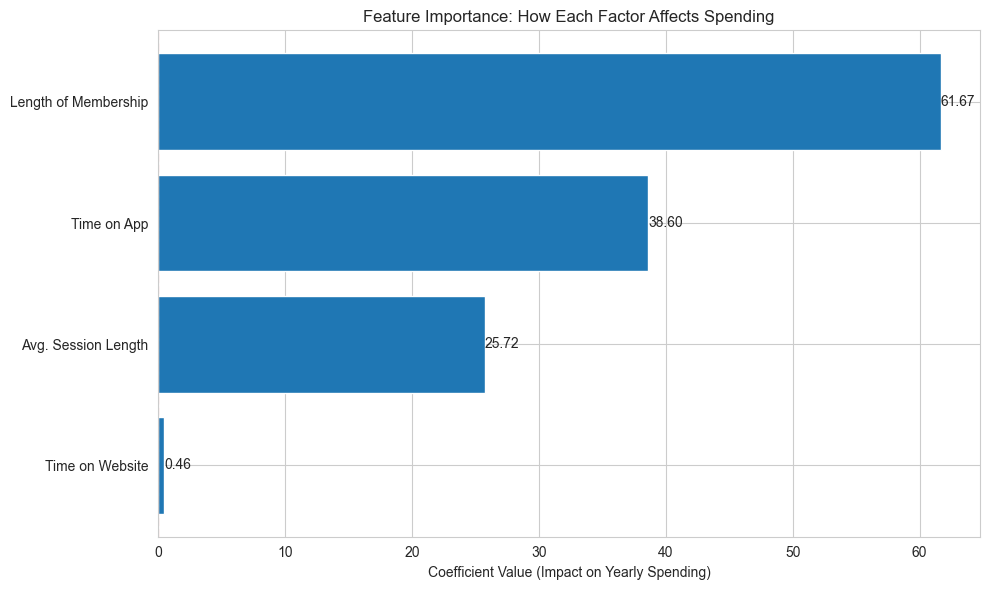

In [8]:

plt.figure(figsize=(10, 6))
plt.barh(range(len(coef_df)), coef_df['Coef'])
plt.yticks(range(len(coef_df)), coef_df.index)
plt.xlabel('Coefficient Value (Impact on Yearly Spending)')
plt.title('Feature Importance: How Each Factor Affects Spending')
plt.axvline(x=0, color='red', linestyle='--', alpha=0.7)
for i, v in enumerate(coef_df['Coef']):
    plt.text(v + np.sign(v) * 0.01 if v != 0 else 0.01, i, f'{v:.2f}', va='center')
plt.tight_layout()
plt.show()


## 9. Residual Analysis

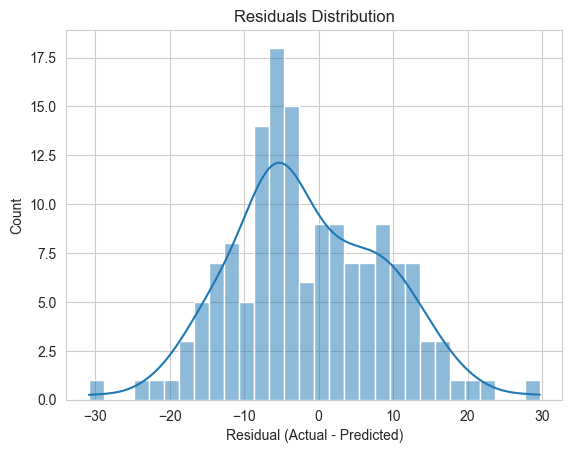

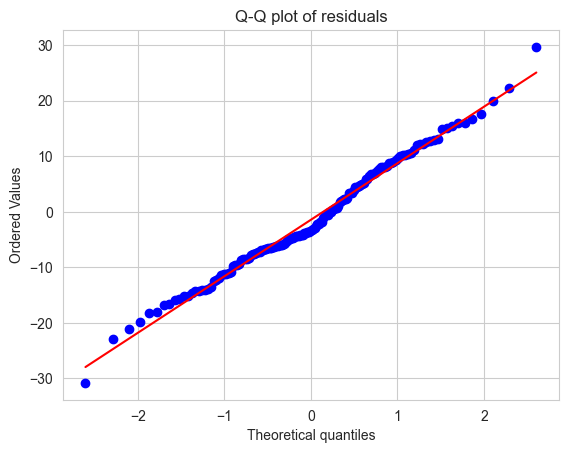

In [9]:

residuals = y_test - predictions

sns.histplot(residuals, bins=30, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residual (Actual - Predicted)')
plt.show()

stats.probplot(residuals, dist="norm", plot=pylab)
pylab.title('Q-Q plot of residuals')
pylab.show()


## 10. Actual vs Predicted Values

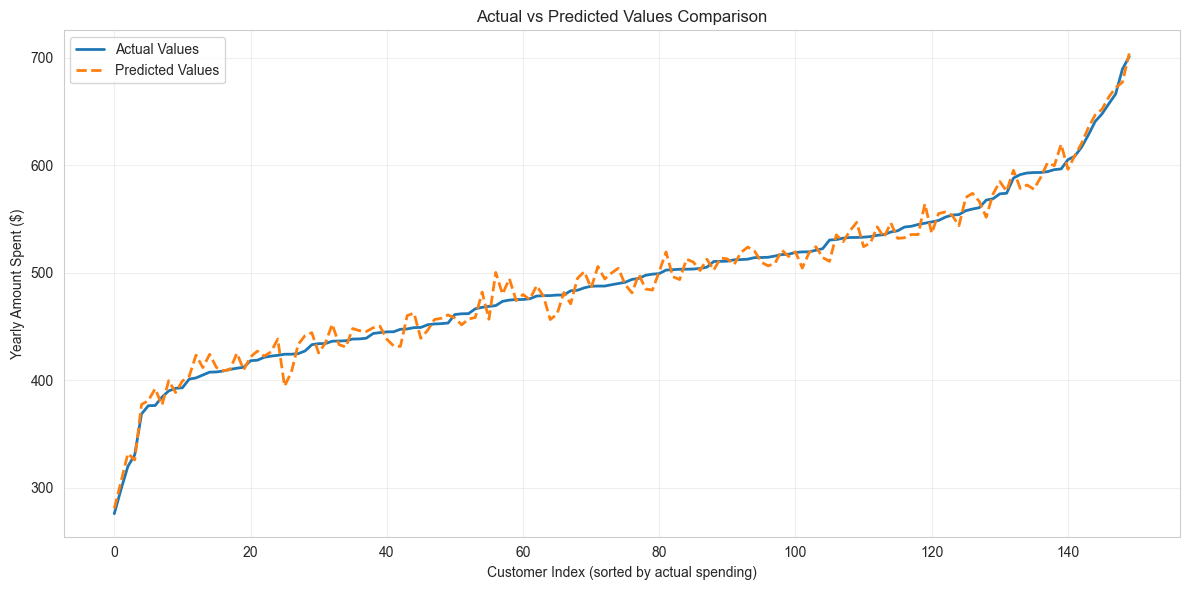

In [10]:

plt.figure(figsize=(12, 6))

sorted_positions = np.argsort(y_test.values)
y_test_sorted = y_test.iloc[sorted_positions]
predictions_sorted = predictions[sorted_positions]

plt.plot(y_test_sorted.values, label='Actual Values', linewidth=2)
plt.plot(predictions_sorted, label='Predicted Values', linewidth=2, linestyle='--')
plt.xlabel('Customer Index (sorted by actual spending)')
plt.ylabel('Yearly Amount Spent ($)')
plt.title('Actual vs Predicted Values Comparison')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
